In [11]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Download Dataset from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# unpakcing the data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Training and Testing Images 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 21s 0us/step


In [7]:
# using model Sequentail with Layers
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# COMPILING THE MODEL HERE

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# FITTING THE MODEL INTO LAYER

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5529 - accuracy: 0.4312 - val_loss: 1.2934 - val_accuracy: 0.5418
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1907 - accuracy: 0.5757 - val_loss: 1.1338 - val_accuracy: 0.5943
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0333 - accuracy: 0.6376 - val_loss: 0.9890 - val_accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9313 - accuracy: 0.6747 - val_loss: 1.0377 - val_accuracy: 0.6413
Epoch 5/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.8571 - accuracy: 0.6998 - val_loss: 0.9294 - val_accuracy: 0.6796
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7970 - accuracy: 0.7235 - val_loss: 0.8894 - val_accuracy: 0.6931
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7544 - accuracy: 0.7369 - val_loss: 0.9291 -

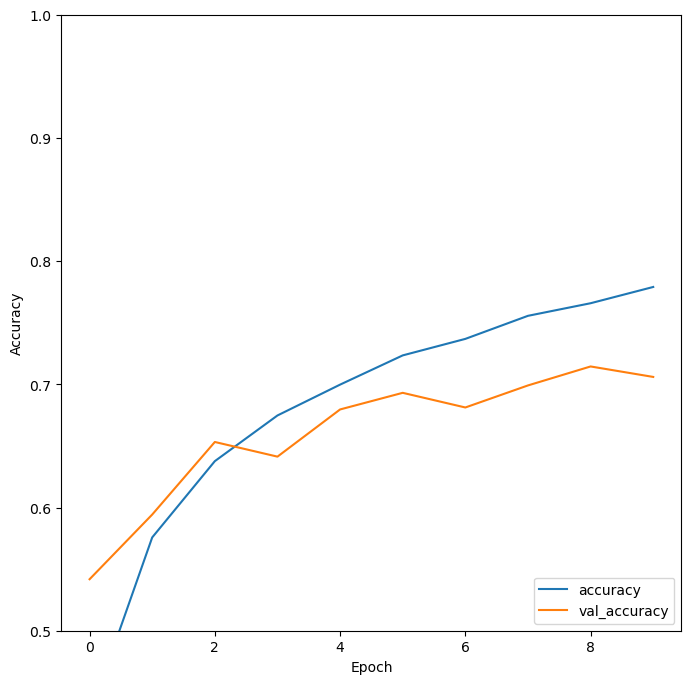

In [10]:
# PLOTING THE DATA IN GRAPH
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")